In [1]:
from fromscratchtoml.decomposition import Decomposition
from fromscratchtoml.toolbox import binary_visualize
import torch as ch

from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline

In [2]:
n = 5
n_dim = 3

X = ch.zeros(n, n_dim)
if n_dim==3:
    m = 5
    c = 2
    d = 5
    for i in range(n):
        X[i,0] = i
        X[i,1] = m*i + c
#         X[i,1] = np.sqrt(i)
        X[i,2] = (d - 2*X[i,0] - 3*X[i,1])/2

elif n_dim==2:
    for i in range(n):
        X[i,0] = i
        X[i,1] = 2*i

print(X)


  0.0000   2.0000  -0.5000
  1.0000   7.0000  -9.0000
  2.0000  12.0000 -17.5000
  3.0000  17.0000 -26.0000
  4.0000  22.0000 -34.5000
[torch.FloatTensor of size 5x3]



In [3]:
# X = ch.zeros(4, 2)
# X[0,0] = 2
# X[0,1] = 4
# X[1,0] = 1
# X[1,1] = 3
# X[2,0] = 0
# X[2,1] = 0
# X[3,0] = 0
# X[3,1] = 0

# X = ch.zeros(2, 2)
# X[0,0] = 4
# X[0,1] = 0
# X[1,0] = 3
# X[1,1] = -5

# X = ch.zeros(2, 3)
# X[0,0] = 2
# X[0,1] = -2
# X[0,2] = 1
# X[1,0] = 5
# X[1,1] = 1
# X[1,2] = 4

In [4]:
r_x, evals, evecs = Decomposition.pca(X - X.mean(dim=0))

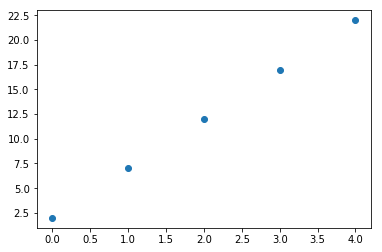

In [5]:
binary_visualize(X)

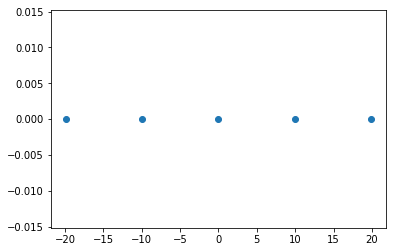

In [6]:
binary_visualize(ch.stack((r_x[...,0], r_x[...,1]), 1))

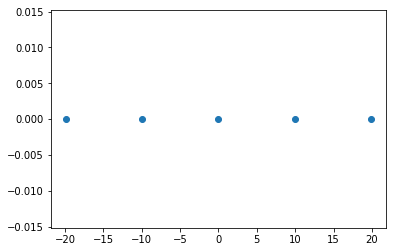

In [7]:
binary_visualize(ch.stack((r_x[...,0], r_x[...,2]), 1))

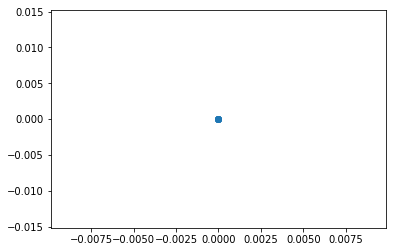

In [8]:
binary_visualize(ch.stack((r_x[...,1], r_x[...,2]), 1))

In [9]:
X = X.numpy()

In [10]:
pca = PCA(n_components=X.shape[1])
pca.fit(X)
skl_x = pca.transform(X)
print(skl_x)

[[ 1.9824228e+01 -1.9073486e-06  1.1920929e-07]
 [ 9.9121141e+00 -9.5367432e-07  5.9604645e-08]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-9.9121141e+00  9.5367432e-07 -5.9604645e-08]
 [-1.9824228e+01  1.9073486e-06 -1.1920929e-07]]


In [11]:
r_x


-19.8242   0.0000   0.0000
 -9.9121   0.0000   0.0000
  0.0000   0.0000   0.0000
  9.9121   0.0000   0.0000
 19.8242   0.0000   0.0000
[torch.FloatTensor of size 5x3]

In [12]:
skl_reconstructed_x = np.dot(skl_x, pca.components_) + X.mean(axis=0)
reconstructed_x = np.dot(r_x, evecs) + X.mean(axis=0)
print(skl_reconstructed_x)
print("")
print(reconstructed_x)

[[-2.3841858e-07  1.9999981e+00 -5.0000000e-01]
 [ 9.9999988e-01  6.9999990e+00 -9.0000000e+00]
 [ 2.0000000e+00  1.2000000e+01 -1.7500000e+01]
 [ 3.0000000e+00  1.7000000e+01 -2.6000000e+01]
 [ 4.0000000e+00  2.2000002e+01 -3.4500000e+01]]

[[  0.          2.000001   -0.5000019]
 [  1.          7.0000005  -9.000001 ]
 [  2.         12.        -17.5      ]
 [  3.         17.        -26.       ]
 [  4.         22.        -34.5      ]]


In [13]:
X

array([[  0. ,   2. ,  -0.5],
       [  1. ,   7. ,  -9. ],
       [  2. ,  12. , -17.5],
       [  3. ,  17. , -26. ],
       [  4. ,  22. , -34.5]], dtype=float32)

In [14]:
evecs


 0.1009  0.5044 -0.8575
-0.0589  0.8635  0.5010
-0.9932  0.0000 -0.1168
[torch.FloatTensor of size 3x3]

In [15]:
pca.components_

array([[-1.0088666e-01, -5.0443327e-01,  8.5753661e-01],
       [-5.8938619e-02,  8.6345071e-01,  5.0097811e-01],
       [-9.9315059e-01, -7.4505806e-09, -1.1684125e-01]], dtype=float32)